# Trabajo final - QLAB PYTHON
### Por Alexandra Porras y Ricardo Bardales

El presente trabajo analiza la data de los módulos de Educación (módulo 300), Trabajo e Ingresos (módulo 500) y Sumaria (módulo 34) de la ENAHO a nivel anual del año 2023.
Las bases de datos se encuentran en microdatos INEI https://proyectos.inei.gob.pe/microdatos/

### 1.1 ENAHO: Módulo Educación

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Primero descargar la base de microdatos INEI. No se pudo subir a github debido al tamaño
educacion= pd.read_csv("Enaho01A-2023-300.csv", encoding="latin1", low_memory=False)

In [2]:
educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108354 entries, 0 to 108353
Columns: 511 entries, AÑO to SUB_CONGLOME
dtypes: float64(2), int64(21), object(488)
memory usage: 422.4+ MB


In [3]:
keep = ['CONGLOME', 'VIVIENDA', 'HOGAR', 'CODPERSO','UBIGEO','P208A','P300A',
        'P301A', 'P306','P311B$1', 'P311B$2', 'P311B$3', 
        'P311B$4', 'P311B$5', 'P311B$6', 'P311B$7']
educacion= educacion.loc[:,keep]
educacion.head()

,CONGLOME,VIVIENDA,HOGAR,CODPERSO,UBIGEO,P208A,P300A,P301A,P306,P311B$1,P311B$2,P311B$3,P311B$4,P311B$5,P311B$6,P311B$7
0,5030,2,11,1,10201,43,4,8,2,,,,,,,
1,5030,2,11,2,10201,41,4,10,2,,,,,,,
2,5030,2,11,3,10201,9,4,3,2,144,72,,68,,50,91
3,5030,2,11,4,10201,7,8,3,2,,,,5,,20,8
4,5030,11,11,1,10201,60,4,4,2,,,,,,,


*Diccionario de variables:*
- CONGLOME =  Número de Conglomerado
- VIVIENDA = Número de Selección de Vivienda
- HOGAR =  Número secuencial del Hogar
- CODPERSO =  Número de orden de la persona
- UBIGEO = Ubicación geográfica
- P208A = Edad en años cumplidos
- P300A = Idioma o lengua materna
- P301A = último año o grado de estudios y nivel que aprobó
- P306 =  Matriculado en algún centro o programa de educación básica o 
superio
- P311B\$1 = Monto de uniforme
- P311B\$2 = Monto de calzado escolar
- P311B\$3 = Monto de libros y textos
- P311B\$4 = Monto de útiles escolares
- P311B\$5 = Monto de Matrícula
- P311B\$6 = Monto de APAFA
- P311B\$7 = Monto de Otros (Fotocopias, cuotas extraordinarias, etc)

Identificador (a nivel de persona): CONGLOME, VIVIENDA, HOGAR, CODPERSOr

In [4]:
educacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108354 entries, 0 to 108353
Data columns (total 16 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   CONGLOME  108354 non-null  int64 
 1   VIVIENDA  108354 non-null  int64 
 2   HOGAR     108354 non-null  int64 
 3   CODPERSO  108354 non-null  int64 
 4   UBIGEO    108354 non-null  int64 
 5   P208A     108354 non-null  int64 
 6   P300A     108354 non-null  int64 
 7   P301A     108354 non-null  int64 
 8   P306      108354 non-null  object
 9   P311B$1   108354 non-null  object
 10  P311B$2   108354 non-null  object
 11  P311B$3   108354 non-null  object
 12  P311B$4   108354 non-null  object
 13  P311B$5   108354 non-null  object
 14  P311B$6   108354 non-null  object
 15  P311B$7   108354 non-null  object
dtypes: int64(8), object(8)
memory usage: 13.2+ MB


In [5]:
col_srt=['CONGLOME','VIVIENDA', 'HOGAR', 'CODPERSO','UBIGEO'] 
educacion[col_srt] = educacion[col_srt].astype('str')

gastos_educacion=['P311B$1','P311B$2','P311B$3','P311B$4','P311B$5','P311B$6','P311B$7']

educacion[gastos_educacion] = educacion[gastos_educacion].replace([' ', '', np.nan], 0)
educacion[gastos_educacion] = educacion[gastos_educacion].astype('int')

In [6]:
# Crear variable departamento (función)
def fun_departamento (UBIGEO):
    tamaño = len(UBIGEO)
    if tamaño < 6:
        return UBIGEO [:1]
    if tamaño > 5:
        return UBIGEO [:2]

In [7]:
educacion['DEPARTAMENTO']= educacion['UBIGEO'].apply(fun_departamento)
educacion

,CONGLOME,VIVIENDA,HOGAR,CODPERSO,UBIGEO,P208A,P300A,P301A,P306,P311B$1,P311B$2,P311B$3,P311B$4,P311B$5,P311B$6,P311B$7,DEPARTAMENTO
0,5030,2,11,1,10201,43,4,8,2,0,0,0,0,0,0,0,1
1,5030,2,11,2,10201,41,4,10,2,0,0,0,0,0,0,0,1
2,5030,2,11,3,10201,9,4,3,2,144,72,0,68,0,50,91,1
3,5030,2,11,4,10201,7,8,3,2,0,0,0,5,0,20,8,1
4,5030,11,11,1,10201,60,4,4,2,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108349,20670,67,11,5,10503,3,4,1,2,0,0,0,0,0,0,0,1
108350,20670,68,11,1,10503,24,4,5,2,0,0,0,0,0,0,0,1
108351,20670,69,11,1,10503,56,4,3,2,0,0,0,0,0,0,0,1
108352,20670,69,11,2,10503,46,4,4,2,0,0,0,0,0,0,0,1


In [8]:
# Variable lengua 3 categorías (función)
lenguas_indigenas=[1,2,3,10,11,12,13,14,15]

def fun_lengua (P300A):
    if P300A in lenguas_indigenas:
        return 'Indigena'
    elif P300A == 4:
        return 'Castellano'
    elif P300A == 6 or 7:
        return 'Extranjero'
    else:
        'Otro'

educacion['LENGUA']=educacion['P300A'].apply(fun_lengua)
educacion.head()

,CONGLOME,VIVIENDA,HOGAR,CODPERSO,UBIGEO,P208A,P300A,P301A,P306,P311B$1,P311B$2,P311B$3,P311B$4,P311B$5,P311B$6,P311B$7,DEPARTAMENTO,LENGUA
0,5030,2,11,1,10201,43,4,8,2,0,0,0,0,0,0,0,1,Castellano
1,5030,2,11,2,10201,41,4,10,2,0,0,0,0,0,0,0,1,Castellano
2,5030,2,11,3,10201,9,4,3,2,144,72,0,68,0,50,91,1,Castellano
3,5030,2,11,4,10201,7,8,3,2,0,0,0,5,0,20,8,1,Extranjero
4,5030,11,11,1,10201,60,4,4,2,0,0,0,0,0,0,0,1,Castellano


In [9]:
# Crear variable edad escolar (primaria - secundaria)
educacion['EDAD_ESCOLAR']= educacion['P208A'].apply(lambda x: 1 if  6 <= x <= 18 else 0)
educacion.head()

,CONGLOME,VIVIENDA,HOGAR,CODPERSO,UBIGEO,P208A,P300A,P301A,P306,P311B$1,P311B$2,P311B$3,P311B$4,P311B$5,P311B$6,P311B$7,DEPARTAMENTO,LENGUA,EDAD_ESCOLAR
0,5030,2,11,1,10201,43,4,8,2,0,0,0,0,0,0,0,1,Castellano,0
1,5030,2,11,2,10201,41,4,10,2,0,0,0,0,0,0,0,1,Castellano,0
2,5030,2,11,3,10201,9,4,3,2,144,72,0,68,0,50,91,1,Castellano,1
3,5030,2,11,4,10201,7,8,3,2,0,0,0,5,0,20,8,1,Extranjero,1
4,5030,11,11,1,10201,60,4,4,2,0,0,0,0,0,0,0,1,Castellano,0


**¿Cuántos niños en edad escolar por departamento no están matriculados en un centro educativo? 
¿Qué departamento tiene la mayor cantidad de niños en edad escolar no matriculados en un centro educativo?**

In [10]:
educacion_f1= educacion[educacion['EDAD_ESCOLAR']==1] # Filtrar niños solo en edad escolar
matricula_niños= educacion_f1.groupby(['DEPARTAMENTO','P306']).size().unstack() # formato wide
matricula_niños.columns=['','Matriculados','No matriculados']
matricula_niños

,,Matriculados,No matriculados
DEPARTAMENTO,,,
1,NaN,1001.0,224.0
10,NaN,871.0,202.0
11,NaN,965.0,199.0
12,NaN,920.0,219.0
13,4.0,1039.0,265.0
14,NaN,899.0,267.0
15,4.0,2527.0,529.0
16,NaN,1493.0,382.0
17,NaN,451.0,124.0


In [11]:
max_departamento= matricula_niños['No matriculados'].idxmax()
max_niños= matricula_niños['No matriculados'].max()

print(f'El departamento con la mayor cantidad de niños en edad escolar no matriculados en un centro educativo es Lima (ubigeo {max_departamento}) \
con un total de {max_niños} menores. No obstante, la medida más apropiada sería calcular la proporción de niños que no están matriculados, \
para lo cual necesitaríamos información respecto al total de niños en edad escolar por departamento.')

El departamento con la mayor cantidad de niños en edad escolar no matriculados en un centro educativo es Lima (ubigeo 15) con un total de 529.0 menores. No obstante, la medida más apropiada sería calcular la proporción de niños que no están matriculados, para lo cual necesitaríamos información respecto al total de niños en edad escolar por departamento.


**¿Cuánto es el gasto total promedio en educación por departamento? (por persona matriculada)**

In [12]:
educacion['P306'] = pd.to_numeric(educacion['P306'], errors='coerce')

# Voy a considerar solo a quienes están matriculados en un centro o promgrama de educación (1) y eliminaré todos los casos cuyo gasto es 999999 (missing value) (2)
cond1 = educacion['P306'] == 1
gastos = ['P311B$1', 'P311B$2', 'P311B$3', 'P311B$4', 'P311B$5', 'P311B$6', 'P311B$7']

educacion_f2 = educacion[cond1 & ~educacion[gastos].isin([999999]).any(axis=1)].copy()

# Variable gasto total educacion
gastos = ['P311B$1', 'P311B$2', 'P311B$3', 'P311B$4', 'P311B$5', 'P311B$6', 'P311B$7']
educacion_f2 = educacion[~educacion[gastos].isin([999999]).any(axis=1)].copy() # Elimino a todos los casos con 999999 (missing value)

educacion_f2['GASTO_TOT_EDUCACION'] = educacion_f2[gastos].sum(axis=1)
educacion_f2.head()

,CONGLOME,VIVIENDA,HOGAR,CODPERSO,UBIGEO,P208A,P300A,P301A,P306,P311B$1,P311B$2,P311B$3,P311B$4,P311B$5,P311B$6,P311B$7,DEPARTAMENTO,LENGUA,EDAD_ESCOLAR,GASTO_TOT_EDUCACION
0,5030,2,11,1,10201,43,4,8,2.0,0,0,0,0,0,0,0,1,Castellano,0,0
1,5030,2,11,2,10201,41,4,10,2.0,0,0,0,0,0,0,0,1,Castellano,0,0
2,5030,2,11,3,10201,9,4,3,2.0,144,72,0,68,0,50,91,1,Castellano,1,425
3,5030,2,11,4,10201,7,8,3,2.0,0,0,0,5,0,20,8,1,Extranjero,1,33
4,5030,11,11,1,10201,60,4,4,2.0,0,0,0,0,0,0,0,1,Castellano,0,0


In [13]:
educacion_f2.groupby(['DEPARTAMENTO'])['GASTO_TOT_EDUCACION'].agg(
    ['mean','max']).sort_values(by='mean', ascending=False)

,mean,max
DEPARTAMENTO,,
4,251.034011,9066
11,247.360153,7314
23,245.563944,7000
17,241.337553,7340
19,241.289398,6242
13,221.409639,10173
18,219.348390,7974
15,211.519983,11333
12,205.179260,5194


**¿Cómo se distribuye el nivel educativo según la pobreza (pobre y no pobre)?**

Para ello hay que trabajar con la data de la sumaria

In [14]:
sumaria = pd.read_csv("Sumaria-2023.csv", encoding= "latin-1")
keep_sumaria=['CONGLOME', 'VIVIENDA','HOGAR','POBREZA']
sumaria_clean= sumaria.loc[:,keep_sumaria]

In [15]:
#Creo una variable con las etiquetas de pobreza (POBREZA_ETIQUETAS)
sumaria_clean['POBREZA_ETIQUETAS']= ''
sumaria_clean.loc[sumaria_clean['POBREZA']==1, 'POBREZA_ETIQUETAS'] = 'pobre extremo'
sumaria_clean.loc[sumaria_clean['POBREZA']==2, 'POBREZA_ETIQUETAS'] = 'pobre no extremo'
sumaria_clean.loc[sumaria_clean['POBREZA']==3, 'POBREZA_ETIQUETAS'] = 'no pobre'

In [16]:
col_srt=['CONGLOME','VIVIENDA', 'HOGAR'] 
sumaria_clean[col_srt] = sumaria_clean[col_srt].astype('str')

In [17]:
# Merge entre el módulo de educación y la sumaria. Me interesa saber si las personas del módulo de educación pertenecen a hogares pobres o no
# Recordar que la pobreza se mide a nivel de hogar
educacion_sumaria = pd.merge(educacion, sumaria_clean, on=['CONGLOME', 'VIVIENDA', 'HOGAR'], how='left')
educacion_sumaria.head()

,CONGLOME,VIVIENDA,HOGAR,CODPERSO,UBIGEO,P208A,P300A,P301A,P306,P311B$1,...,P311B$3,P311B$4,P311B$5,P311B$6,P311B$7,DEPARTAMENTO,LENGUA,EDAD_ESCOLAR,POBREZA,POBREZA_ETIQUETAS
0,5030,2,11,1,10201,43,4,8,2.0,0,...,0,0,0,0,0,1,Castellano,0,3,no pobre
1,5030,2,11,2,10201,41,4,10,2.0,0,...,0,0,0,0,0,1,Castellano,0,3,no pobre
2,5030,2,11,3,10201,9,4,3,2.0,144,...,0,68,0,50,91,1,Castellano,1,3,no pobre
3,5030,2,11,4,10201,7,8,3,2.0,0,...,0,5,0,20,8,1,Extranjero,1,3,no pobre
4,5030,11,11,1,10201,60,4,4,2.0,0,...,0,0,0,0,0,1,Castellano,0,3,no pobre


In [18]:
# Recodificación'Nivel_Educativo' con solo 3 categorías (Sin nivel, educación básica y educación superior)
educacion_sumaria['NIVEL_EDUCATIVO'] = ''

# Asignar las categorías de nivel educativo según el valor de 'P301A'
educacion_sumaria.loc[educacion_sumaria['P301A'] == 1, 'NIVEL_EDUCATIVO'] = 'Sin nivel'
educacion_sumaria.loc[educacion_sumaria['P301A'].isin([2,3, 4, 5, 6, 12]), 'NIVEL_EDUCATIVO'] = 'Educación básica'
educacion_sumaria.loc[educacion_sumaria['P301A'].isin([7, 8, 9, 10, 11]), 'NIVEL_EDUCATIVO'] = 'Educación superior'

# educacion_sumaria[['P208A','P301A', 'NIVEL_EDUCATIVO']].head()

In [19]:
educacion_sumaria.groupby(['POBREZA_ETIQUETAS'])['NIVEL_EDUCATIVO'].value_counts()

POBREZA_ETIQUETAS  NIVEL_EDUCATIVO   
no pobre           Educación básica      53895
                   Educación superior    21840
                   Sin nivel              3923
                                            52
pobre extremo      Educación básica       5698
                   Sin nivel               840
                   Educación superior      224
                                            15
pobre no extremo   Educación básica      18048
                   Educación superior     2024
                   Sin nivel              1757
                                            38
Name: count, dtype: int64

In [20]:
#Veamos las proporciones
educacion_sumaria.groupby(['POBREZA_ETIQUETAS'])['NIVEL_EDUCATIVO'].value_counts(normalize=True) * 100 

POBREZA_ETIQUETAS  NIVEL_EDUCATIVO   
no pobre           Educación básica      67.613850
                   Educación superior    27.399323
                   Sin nivel              4.921591
                                          0.065236
pobre extremo      Educación básica      84.078501
                   Sin nivel             12.394865
                   Educación superior     3.305297
                                          0.221337
pobre no extremo   Educación básica      82.535327
                   Educación superior     9.255956
                   Sin nivel              8.034938
                                          0.173778
Name: proportion, dtype: float64

A continuación representaré gráficamente a los departamentos según su ingreso promedio del hogar y promedio de integrantes del hogar (data sumaria)

*Diccionrio de variables*

- CONGLOME = Número de Conglomerado
- 
VIVIENDA = Número de Selección de Viviend
- 
HOGAR = Número secuencial del Hog
- INGHOG2D =  Ingreso neto Total
- GASHOG2D = Gasto Total bruto
- GA03HD = Gasto por alquilerar
- ESTRSOCIAL =  Estrato socioeconomico 

In [21]:
keep_sumaria=['CONGLOME', 'VIVIENDA','HOGAR','INGHOG2D','GASHOG2D','GA03HD','UBIGEO']
sumaria2= sumaria.loc[:,keep_sumaria]

sumaria2['UBIGEO'] = educacion['UBIGEO'].astype('str')

# Creamos la variable departamento (la función fue creada previamente)
sumaria2['DEPARTAMENTO']= sumaria2['UBIGEO'].apply(fun_departamento)

In [22]:
sumaria2['DEPARTAMENTO'] = sumaria2['DEPARTAMENTO'].astype(int)

sumaria2['DEPARTAMENTO_ETIQUETA'] = sumaria2['DEPARTAMENTO'].replace({
    1: 'Amazonas', 2: 'Áncash', 3: 'Apurímac', 4: 'Arequipa', 5: 'Ayacucho',
    6: 'Cajamarca', 7: 'Callao', 8: 'Cusco', 9: 'Huancavelica', 10: 'Huánuco',
    11: 'Ica', 12: 'Junín', 13: 'La Libertad', 14: 'Lambayeque', 15: 'Lima',
    16: 'Loreto', 17: 'Madre de Dios', 18: 'Moquegua', 19: 'Pasco',
    20: 'Piura', 21: 'Puno', 22: 'San Martín', 23: 'Tacna', 24: 'Tumbes',
    25: 'Ucayali'
})

In [23]:
sumaria2_mean=sumaria2.groupby('DEPARTAMENTO_ETIQUETA')[['GASHOG2D', 'INGHOG2D','GA03HD']].mean()
sumaria2_mean

,GASHOG2D,INGHOG2D,GA03HD
DEPARTAMENTO_ETIQUETA,,,
Amazonas,33891.088914,42413.746814,687.125000
Apurímac,30186.552089,38502.812430,509.511838
Arequipa,28836.038978,35978.386585,374.118170
Ayacucho,29442.779873,36812.407643,293.162747
Cajamarca,27785.287657,35202.446000,321.291328
Callao,27403.526193,33282.612622,271.986278
Cusco,29758.828388,39062.744912,411.742060
Huancavelica,27614.779770,35088.916785,488.036027
Huánuco,28235.954910,35717.766408,563.108844


In [24]:
# Gráfico1: 
import altair as alt

#Departamento sea una variable y no índice
sumaria2_mean = sumaria2_mean.reset_index()

alt.Chart(sumaria2_mean).mark_point().encode(
    x = alt.X("INGHOG2D", title="Ingreso promedio del Hogar (INGHOG2D)"),
    y = alt.Y("GASHOG2D", title="Gasto promedio del Hogar (GASHOG2D)"),
    size = alt.Size("GA03HD", title="Gasto promedio por alquiler (GASHOG2D)"),
    tooltip = ["DEPARTAMENTO_ETIQUETA"]).properties(
    title="Relación entre ingreso y gasto promedio del hogar por Departamento").interactive()

alt.Chart(...)

Se observa una relación lineal entre el promedio de ingresos por hogar y el promedio de gastos por hogar: los departamentos cuyo ingreso promedio por hogar es mayor, también tienen un mayor gasto, como sería esperado. Asimismo, mediante el tamaño de los círculos, es posible identificar los departamentos que tienen el mayor gasto promedio por concepto de alquiler.

### 1.2 ENAHO: Módulo Empleo e Ingresos

###### Retomamos Sumaria 

In [25]:
DF_sumaria = sumaria.copy()

In [26]:
#1. creamos variable de ingreso por transferencias de origen público  (ingreso_transferencias)

DF_sumaria["ingreso_transferencias"] = DF_sumaria[["INGTPU01", "INGTPU02", "INGTPU03", "INGTPU04", "INGTPU05", "INGTPU10", "INGTPU11", "INGTPU12", "INGTPU13", "INGTPU14", "INGTPU15", "INGTPU16"]].sum(axis=1)

In [27]:
#2. creacción de recibe dinero público: mas de dos transferencia 
DF_sumaria["dos_o_mas_trasnferencias"]=((DF_sumaria[["INGTPU01", "INGTPU02", "INGTPU03", "INGTPU04", "INGTPU05", "INGTPU10", "INGTPU11", "INGTPU12", "INGTPU13", "INGTPU14", "INGTPU15", "INGTPU16"]]>0).sum(axis=1)>2).astype(int)

In [28]:
#3. creamos número total de fuentes de transferencias recibidas por familia
DF_sumaria["total_transferencias"] = (DF_sumaria[["INGTPU01", "INGTPU02", "INGTPU03", "INGTPU04","INGTPU05", "INGTPU10", "INGTPU11", "INGTPU12","INGTPU13", "INGTPU14", "INGTPU15", "INGTPU16"]] > 0).sum(axis=1)

In [29]:
#4. a. Funcion para categorizar por fuente de tranferencias 
def clasificar_transferencias(total):
    '''
    esta funcion clasifica en 4 categorias por cantidad de fuentes de trasnferencias
    '''
    if total == 0:
        return "ninguna transferencia"
    elif 1 <= total <= 2:
        return "1 a 2 transferencias"
    elif 3 <= total <= 4:
        return "3 a 4 transferencias"
    elif 5 <= total <= 6:
        return "5 a 6 transferencias"
    else:
        return "No deberias existir"

In [30]:
#4. b. creamos la cariable categorizar por fuente de tranferencias 
DF_sumaria["nivel_transferencia"] = DF_sumaria["total_transferencias"].apply(clasificar_transferencias)

In [31]:
#4.c. observamos la distribución 
DF_sumaria["nivel_transferencia"].value_counts()

nivel_transferencia
ninguna transferencia    18433
1 a 2 transferencias     13502
3 a 4 transferencias      1878
5 a 6 transferencias        73
Name: count, dtype: int64

Diccionario de variables

- INGTPU01 = Ingreso por transferencias corrientes públicas: JUNTOS
- INGTPU02 = Ingreso por transferencias corrientes públicas: Otros
- INGTPU03 = Ingreso por transferencias corrientes públicas: Pension 65
- INGTPU04 = Ingreso por transferencias corrientes públicas: Beca 18
- INGTPU05 = Ingreso por transferencias corrientes públicas: Bono de Gas
- INGTPU10 = Ingreso por transferencias corrientes públicas: Bono electricidad
- INGTPU11 = Ingreso por transferencias corrientes públicas: Bono niño
- INGTPU12 = Ingreso por transferencias corrientes públicas: Bono ONP para jubilados
- INGTPU13 = Ingreso por transferencias corrientes públicas: Programa Contigo
- INGTPU14 = Ingreso por transferencias corrientes públicas: Bono Yanapay
- INGTPU15 = Ingreso por transferencias corrientes públicas: Bono 600
- INGTPU16 = Ingreso por transferencias corrientes públicas: Bono alimentario

- ingreso_transferencias = ingreso por transferencias de origen público 
- dos_o_mas_trasnferencias = haber recibido dos o mas fuentes de ingresos por transferencias de origen público 
- total_transferencias = total de fuentes de ingresos por transferencias de origen público 
- nivel_transferencia = total_transferencias en 4 categorias 

In [32]:
#5. seleccionamos las variables a usar
DF_sumaria_v2=DF_sumaria[["CONGLOME","VIVIENDA","HOGAR","ESTRSOCIAL", "ingreso_transferencias","dos_o_mas_trasnferencias","nivel_transferencia","total_transferencias"]]

In [33]:
#6. varificamos y reconocemos valores
DF_sumaria_v2["total_transferencias"].value_counts()

total_transferencias
0    18433
1     9876
2     3626
3     1489
4      389
5       64
6        9
Name: count, dtype: int64

Dejamos este DF por un momento para desarrollar el DF de Empleo e ingresos

###### Abrir módulo de empleo

In [34]:
DF_empleo= pd.read_csv("Enaho01a-2023-500.csv", encoding="latin-1", low_memory=False)

In [35]:
#primero 
P5041_a_P50410 = [f"P504{x}" for x in range(1, 11)] 
DF_empleo_v2= DF_empleo [["CONGLOME", "VIVIENDA", "HOGAR", "P501", "P502", "P503", *P5041_a_P50410]]

Diccionario de variables

- CONGLOME =  Número de Conglomerado
- VIVIENDA = Número de Selección de Vivienda
- HOGAR =  Número secuencial del Hogar
- P501: Trabajo realizado la semana pasada (sin contar quehaceres del hogar)
- P502: Empleo fijo al que se volverá próximamente
- P503: Negocio propio al que se volverá próximamente
- P5041: Actividad realizada para obtener ingresos: Trabajo en negocio propio o familiar
- P5042: Actividad realizada para obtener ingresos: Ofrecimiento de servicios
- P5043: Actividad realizada para obtener ingresos: Hacer algo en casa para vender
- P5044: Actividad realizada para obtener ingresos: Venta de productos (belleza, ropa, joyas, etc.)
- P5045: Actividad realizada para obtener ingresos: Realización de labor artesanal
- P5046: Actividad realizada para obtener ingresos: Prácticas pagadas en centro de trabajo
- P5047: Actividad realizada para obtener ingresos: Trabajo para hogar particular
- P5048: Actividad realizada para obtener ingresos: Fabricación de productos
- P5049: Actividad realizada para obtener ingresos: Labores remuneradas en chacra o cuidado de animales
- P50410: Actividad realizada para obtener ingresos: otro

###### Merge a ambos DF

In [36]:
# Realizamos el merge 
DF_junto= pd.merge(left =DF_sumaria_v2,
         right=DF_empleo_v2,
         left_on=["CONGLOME","VIVIENDA","HOGAR"],
         right_on=["CONGLOME","VIVIENDA","HOGAR"],
         how="inner")
DF_junto

,CONGLOME,VIVIENDA,HOGAR,ESTRSOCIAL,ingreso_transferencias,dos_o_mas_trasnferencias,nivel_transferencia,total_transferencias,P501,P502,...,P5041,P5042,P5043,P5044,P5045,P5046,P5047,P5048,P5049,P50410
0,5030,2,11,4,0,0,ninguna transferencia,0,1,,...,,,,,,,,,,
1,5030,2,11,4,0,0,ninguna transferencia,0,1,,...,,,,,,,,,,
2,5030,11,11,4,0,0,ninguna transferencia,0,1,,...,,,,,,,,,,
3,5030,11,11,4,0,0,ninguna transferencia,0,1,,...,,,,,,,,,,
4,5030,11,11,4,0,0,ninguna transferencia,0,1,,...,,,,,,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86649,20670,67,11,6,1383,0,1 a 2 transferencias,2,1,,...,,,,,,,,,,
86650,20670,68,11,6,0,0,ninguna transferencia,0,1,,...,,,,,,,,,,
86651,20670,69,11,6,0,0,ninguna transferencia,0,1,,...,,,,,,,,,,
86652,20670,69,11,6,0,0,ninguna transferencia,0,1,,...,,,,,,,,,,


In [37]:
DF_junto["ingreso_transferencias"] = DF_junto["ingreso_transferencias"].fillna(0).astype(float)  # Asegura valores numéricos

In [38]:
# Visualizamos el estrato social (1 a 5 urbano y 6 rural) y total transferencias es la cantidad de fuentes 
DF_junto.groupby(["total_transferencias"])["ESTRSOCIAL"].value_counts().unstack(fill_value=0)

ESTRSOCIAL,1,2,3,4,5,6
total_transferencias,,,,,,
0,1335,2701,6312,12259,15094,8658
1,673,1527,2890,5142,6285,9179
2,20,53,208,714,2050,6293
3,2,4,41,170,718,3014
4,0,0,4,33,170,881
5,0,0,0,20,50,118
6,0,0,0,0,6,30


In [39]:
DF_junto.pivot_table(
    index="ESTRSOCIAL", 
    columns="total_transferencias", #nivel_transferencia, 
    values="ingreso_transferencias",
    aggfunc="mean" )

total_transferencias,0,1,2,3,4,5,6
ESTRSOCIAL,,,,,,,
1,0.0,15224.109955,5933.800000,2126.000000,NaN,NaN,NaN
2,0.0,13728.127701,7119.584906,9797.000000,NaN,NaN,NaN
3,0.0,9324.048097,6722.149038,4586.731707,6359.500000,NaN,NaN
4,0.0,7098.607935,5962.211485,5879.394118,5553.363636,6224.550000,NaN
5,0.0,3120.837391,2983.697073,2963.129526,4124.482353,6470.320000,5941.0
6,0.0,1863.294259,2133.627840,3037.307896,3804.181612,4928.949153,5841.7


In [40]:
#una maneera adicional es 
calor = DF_junto.pivot_table(
    index="ESTRSOCIAL", 
    columns="total_transferencias", 
    values="ingreso_transferencias",
    aggfunc="mean",
    fill_value=0
).round(0).astype(int) 

In [41]:
calor

total_transferencias,0,1,2,3,4,5,6
ESTRSOCIAL,,,,,,,
1,0,15224,5934,2126,0,0,0
2,0,13728,7120,9797,0,0,0
3,0,9324,6722,4587,6360,0,0
4,0,7099,5962,5879,5553,6225,0
5,0,3121,2984,2963,4124,6470,5941
6,0,1863,2134,3037,3804,4929,5842


In [42]:
print(calor.dtypes)

total_transferencias
0    int32
1    int32
2    int32
3    int32
4    int32
5    int32
6    int32
dtype: object


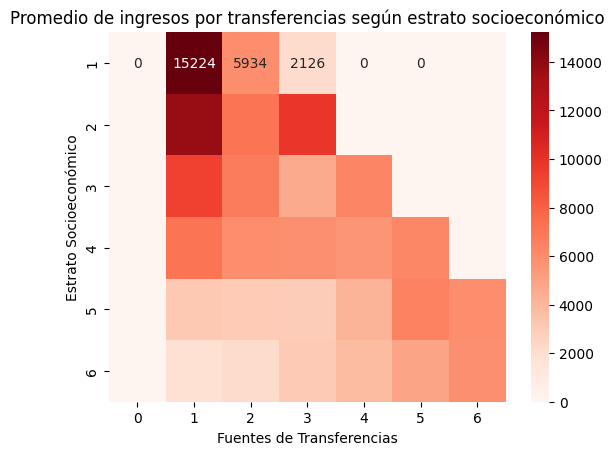

In [43]:
sns.heatmap(calor.round(0).astype(int), annot=True, fmt="d", cmap="Reds")
plt.title("Promedio de ingresos por transferencias según estrato socioeconómico")
plt.xlabel("Fuentes de Transferencias")
plt.ylabel("Estrato Socioeconómico")
plt.show()

El mapa de calor describe el promedio de ingresos provenientes de transferencias públicas, recibidos por las familias según su estrato socioeconómico y la cantidad de fuentes de transferencias. En primer lugar, es importante precisar que las transferencias son principalmente de carácter público, específicamente, de apoyo a programas sociales o ayudas otorgadas en momentos determinados. 

Se observa que los estratos primero y segundo (A y B, respectivamente) tienen la mayor proporción de transferencias, las cuales provienen principalmente de una única fuente, concentrando sus ingresos por transferencias públicas en dos fuentes para el primer estrato y en tres para el segundo. Por otro lado, el estrato 3 (C) muestra una disminución en los ingresos de origen público a medida que aumenta la cantidad de fuentes. Lo contrario ocurre con el último estrato urbano y el estrato rural (estrato 6), cuyos ingresos aumentan a medida que se incrementan las fuentes de transferencias. 

Una cuestión que podría ser explorada en futuras investigaciones es la proporcionalidad entre la cantidad de transferencias recibidas por los distintos estratos y los montos correspondientes. 

##### Fin del trabajo u.u